# Travaux pratiques sur les SVM 

## Importations des modules nécessaires 

In [13]:
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Ajoutez le chemin du dossier où se trouve le module svm_source (si besoin)
sys.path.append(r"C:\Users\Abdoulaye Diop\Desktop\TP SVM-20240923")

try:
    import svm_source  
except ModuleNotFoundError as e:
    print(f"Erreur d'importation: {e}")

from sklearn import svm
from sklearn import datasets
from sklearn import svm
from sklearn import datasets
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from time import time

scaler = StandardScaler()

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')


## Question 1 

#### Classification binaire avec le modèle SVM à noyau linéaire sur les données des fleurs d'iris

Le jeu de données des fleurs d'iris, également connu sous le nom d'Iris dataset, est un ensemble de données très utilisé en machine learning pour les tâches de classification. Ce jeu de données contient des informations sur trois espèces de fleurs d'iris : Iris setosa, Iris versicolor et Iris virginica. Dans cette analyse, nous nous concentrerons uniquement sur deux classes.

In [63]:
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
# melanger le dataset 
X, y = shuffle(X, y)
# Division du jeu de données en ensembles d'entraînement et de test (50% pour chaque)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

#### Visualisation du dataset 

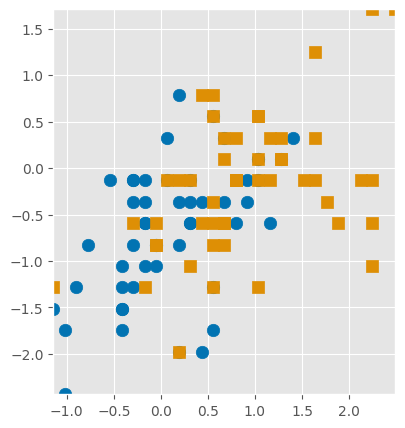

In [66]:
plt.ion()
plt.figure(figsize=(15, 5))
plt.subplot(131)
svm_source.plot_2d(X, y)


In [64]:

# Création du modèle SVM avec noyau linéaire
clf = SVC(kernel='linear')

# Entraînement du modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# predict labels for the test data base
y_pred = clf.predict(X_test)

# Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7


 Le modele fait 70%  de bonne  prédiction  

#### Frontière de décision 

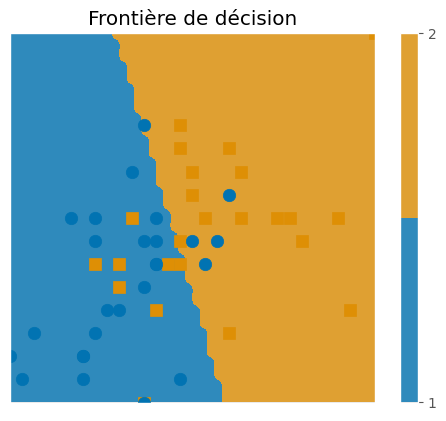

In [65]:
def f(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf.predict(xx.reshape(1, -1))
plt.figure()
svm_source.frontiere(f, X_train, y_train, w=None, step=50, alpha_choice=1)
plt.title("Frontière de décision")
plt.show()

## Question  2 

## Comparaison des deux choix de noyau 

In [70]:
parameters = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 200))}
param_grid_linear=parameters

# Recherche par grille pour le noyau linéaire
grid_search_linear = GridSearchCV(SVC(), param_grid_linear, n_jobs=-1)
grid_search_linear.fit(X_train, y_train)

# Affichage du meilleur modèle pour le noyau linéaire
best_model_linear = grid_search_linear.best_estimator_
print(f"Meilleur modèle avec noyau linéaire : {best_model_linear}")
print(f"Meilleurs paramètres pour le noyau linéaire : {grid_search_linear.best_params_}")

# Prédiction et évaluation de la performance du modèle linéaire
clf_linear=best_model_linear
y_pred_linear = best_model_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Précision du modèle avec noyau linéaire : {accuracy_linear:.2f}")

# Paramètres pour le noyau polynomial (incluant degree)
Cs = list(np.logspace(-3, 3, 5))
gammas = 10. ** np.arange(1, 2)
degrees = np.r_[1, 2, 3]

parameters1 = {'kernel': ['poly'], 'C': Cs, 'gamma': gammas, 'degree': degrees}

param_grid_poly =parameters1

# Recherche par grille pour le noyau polynomial
grid_search_poly = GridSearchCV(SVC(), param_grid_poly, refit=True, verbose=0)
grid_search_poly.fit(X_train, y_train)

# Affichage du meilleur modèle pour le noyau polynomial
best_model_poly = grid_search_poly.best_estimator_
print(f"Meilleur modèle avec noyau polynomial : {best_model_poly}")
print(f"Meilleurs paramètres pour le noyau polynomial : {grid_search_poly.best_params_}")

# Prédiction et évaluation de la performance du modèle polynomial
clf_poly=best_model_poly
y_pred_poly = best_model_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Précision du modèle avec noyau polynomial : {accuracy_poly:.2f}")



Meilleur modèle avec noyau linéaire : SVC(C=np.float64(0.7842822061337682), kernel='linear')
Meilleurs paramètres pour le noyau linéaire : {'C': np.float64(0.7842822061337682), 'kernel': 'linear'}
Précision du modèle avec noyau linéaire : 0.70
Meilleur modèle avec noyau polynomial : SVC(C=np.float64(0.03162277660168379), degree=np.int64(1),
    gamma=np.float64(10.0), kernel='poly')
Meilleurs paramètres pour le noyau polynomial : {'C': np.float64(0.03162277660168379), 'degree': np.int64(1), 'gamma': np.float64(10.0), 'kernel': 'poly'}
Précision du modèle avec noyau polynomial : 0.68


#### Pour le meilleur  parametre lineaire

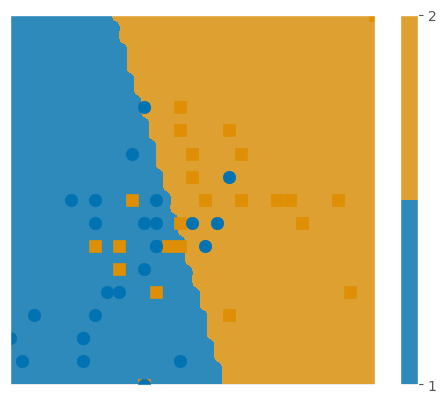

In [68]:
clf_grid=clf_linear
def f_grid(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_grid.predict(xx.reshape(1, -1))

# display the frontiere
plt.figure()
svm_source.frontiere(f_grid, X_train, y_train, w=None, step=50, alpha_choice=1)


#### Pour le meilleur  parametre lineaire

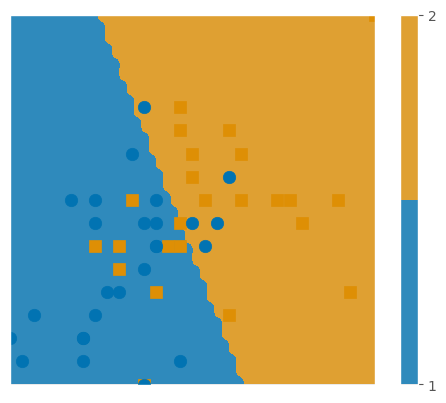

In [72]:
clf_grid=clf_poly
def f_grid(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_grid.predict(xx.reshape(1, -1))

# display the frontiere
plt.figure()
svm_source.frontiere(f_grid, X_train, y_train, w=None, step=50, alpha_choice=1)


Visualisation de la classification 

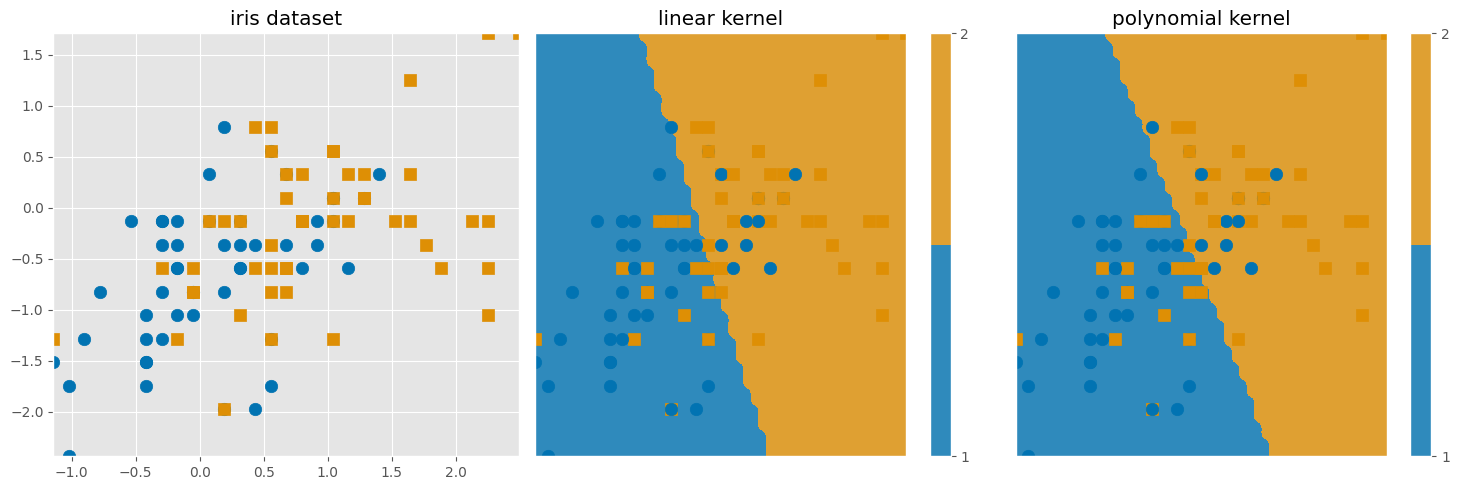

In [73]:
def f_linear(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_linear.predict(xx.reshape(1, -1))

def f_poly(xx):
    """Classifier: needed to avoid warning due to shape issues"""
    return clf_poly.predict(xx.reshape(1, -1))

plt.ion()
plt.figure(figsize=(15, 5))
plt.subplot(131)
svm_source.plot_2d(X, y)

plt.title("iris dataset")

plt.subplot(132)
svm_source.frontiere(f_linear, X, y)
plt.title("linear kernel")

plt.subplot(133)
svm_source.frontiere(f_poly, X, y)
plt.title("polynomial kernel")
plt.tight_layout()
plt.draw()

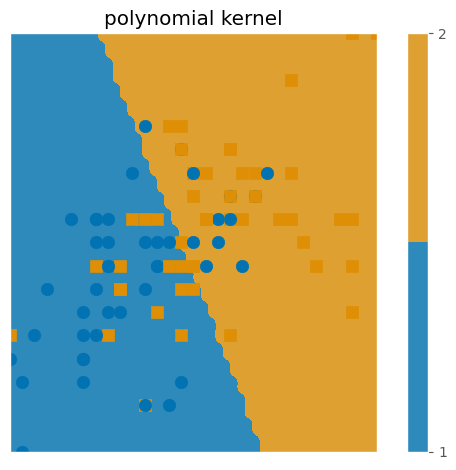

In [74]:
svm_source.frontiere(f_poly, X, y)
plt.title("polynomial kernel")
plt.tight_layout()
plt.draw()

* Formule de l'accuracy :


\[
\text{Accuracy} = \frac{\text{Nombre de prédictions correctes}}{\text{Nombre total de prédictions}}
\]


\newline

Nous avons effectué une recherche par grille sur le paramètre de régularisation afin de récupérer le meilleur modèle pour chaque noyau. Nous constatons que le modèle avec un noyau polynomial est légèrement meilleur, avec une précision de 0.76, tandis que le modèle avec un noyau linéaire présente une performance de 0.74.

## Question  3 Bonus  

 Fonction cout:

 \newline 
 
\text{minimiser} \quad \frac{1}{2} ||w||^2 + C \sum_{i=1}^{n} \xi_i
\]


La fonction coût du SVM cherche à maximiser la marge entre les classes. Avec une valeur plus faible de 
𝐶
C, le SVM favorise la maximisation de cette marge, même si cela implique de mal classer certains exemples. Le modèle devient alors plus général et moins sensible aux fluctuations des données d'entraînement.

## Q4

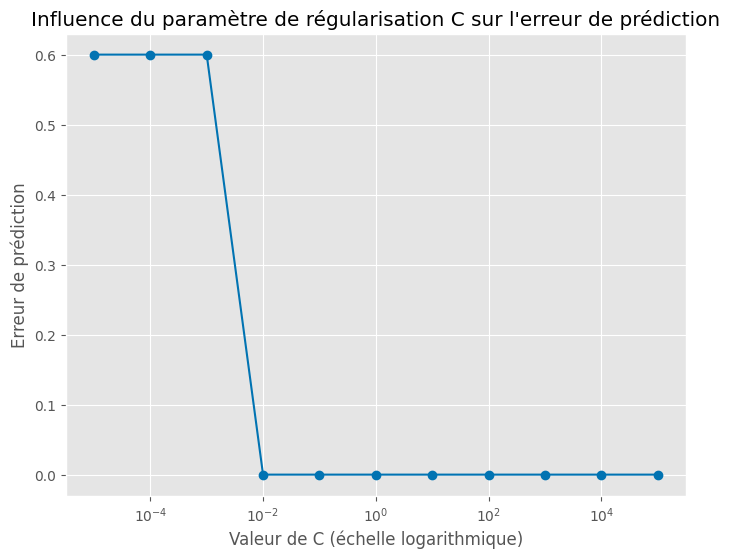

In [80]:

# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des valeurs de C à tester sur une échelle logarithmique
C_values = np.logspace(5, -5, num=11)  # de 1e5 à 1e-5

# Stocker les erreurs pour chaque valeur de C
errors = []

# Pour chaque valeur de C, entraîner un SVM et calculer l'erreur
for C in C_values:
    svm_model = SVC(kernel='linear', C=C)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)  # Erreur = 1 - Précision
    errors.append(error)

# Afficher l'erreur de prédiction en fonction de C
plt.figure(figsize=(8, 6))
plt.plot(C_values, errors, marker='o')
plt.xscale('log')  # Echelle logarithmique pour C
plt.xlabel('Valeur de C (échelle logarithmique)')
plt.ylabel('Erreur de prédiction')
plt.title('Influence du paramètre de régularisation C sur l\'erreur de prédiction')
plt.grid(True)
plt.show()


In [43]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4,
                              color=True, funneled=False, slice_=None,
                              download_if_missing=True)

In [81]:
images = lfw_people.images
n_samples, h, w, n_colors = images.shape
target_names = lfw_people.target_names.tolist()
#n_classes = target_names.shape[0]

print(f"Nombre d'échantillons: {n_samples}")
print(f"Hauteur des images: {h}")
print(f"Largeur des images: {w}")
print(f"Nombre de couleurs: {n_colors}")
#print(f"Nombre de classes: {n_classes}")
#print("Noms des cibles:", target_names)

Nombre d'échantillons: 1288
Hauteur des images: 50
Largeur des images: 37
Nombre de couleurs: 3


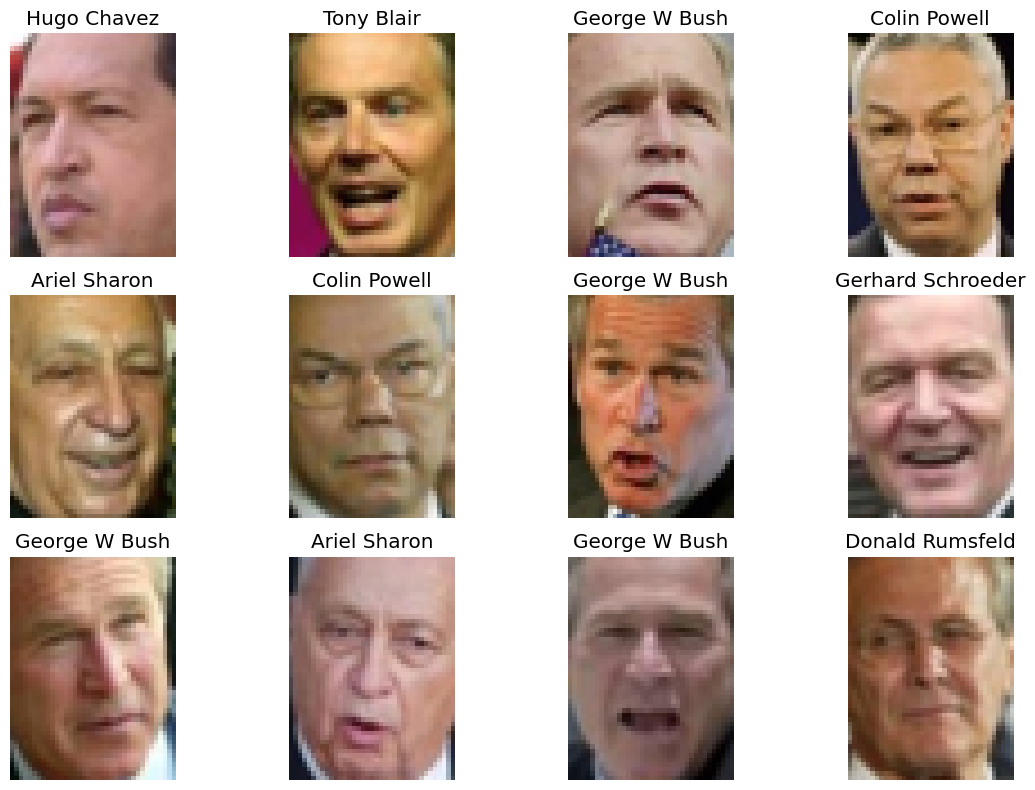

In [82]:
# Visualiser quelques images
plt.figure(figsize=(12, 8))
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(target_names[lfw_people.target[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Créer un modèle SVM
clf = SVC(kernel='linear', class_weight='balanced')

# Entraîner le modèle
clf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)



In [53]:
# Vérifie les classes uniques dans y_test
unique_classes = np.unique(y_test)
print("Classes uniques dans y_test :", unique_classes)
print("Nombre de classes uniques :", len(unique_classes))


Classes uniques dans y_test : [1 2]
Nombre de classes uniques : 2


In [54]:
# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)

# Vérifie les classes uniques dans y_test
unique_classes = np.unique(y_test)
print("Classes uniques dans y_test :", unique_classes)
print("Nombre de classes uniques :", len(unique_classes))

# Récupérer les noms de cibles pour les classes uniques dans y_test
# Utiliser une liste pour obtenir les noms correspondants
unique_target_names = [target_names[i] for i in unique_classes]
print("Noms des cibles uniques :", unique_target_names)

# Évaluer les performances du modèle avec les noms de cibles uniques
print(classification_report(y_test, y_pred, target_names=unique_target_names))


Classes uniques dans y_test : [1 2]
Nombre de classes uniques : 2
Noms des cibles uniques : ['Colin Powell', 'Donald Rumsfeld']
                 precision    recall  f1-score   support

   Colin Powell       0.71      0.83      0.77        24
Donald Rumsfeld       0.82      0.69      0.75        26

       accuracy                           0.76        50
      macro avg       0.77      0.76      0.76        50
   weighted avg       0.77      0.76      0.76        50



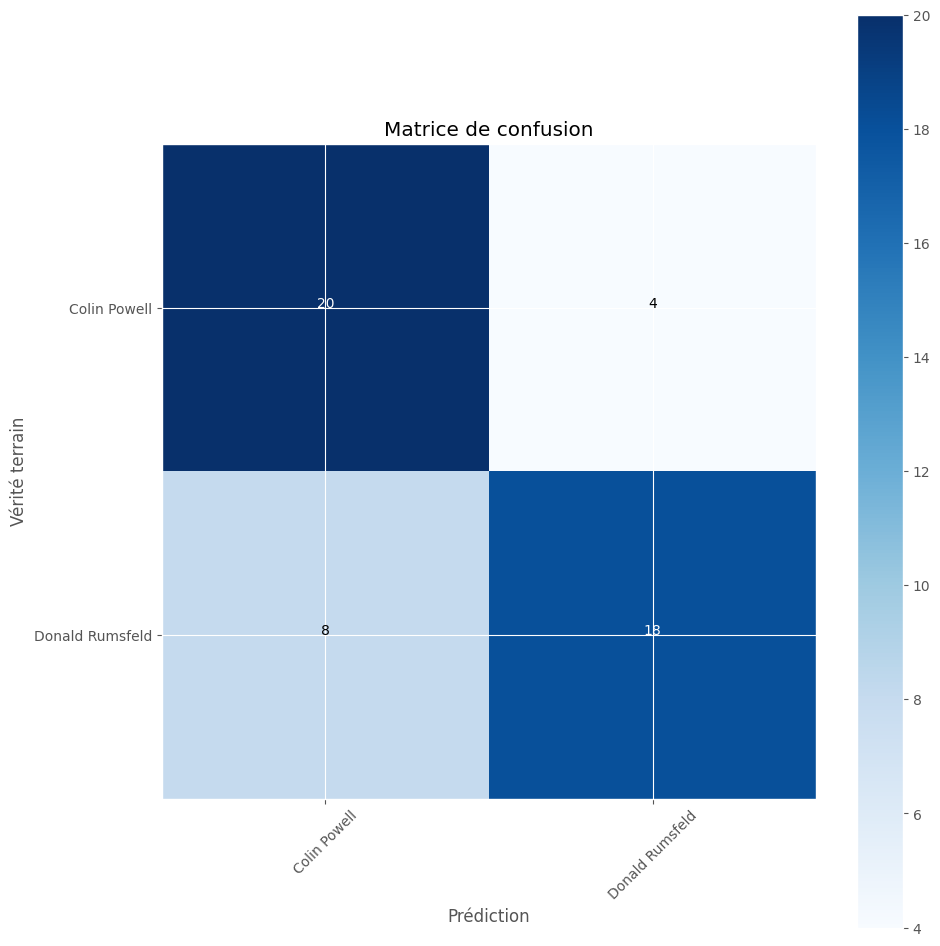

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Prédire sur l'ensemble de test
y_pred = clf.predict(X_test)  # Assurez-vous que clf et X_test sont déjà définis

# Définir n_classes en fonction des classes uniques dans y_test
n_classes = len(np.unique(y_test))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(n_classes)

# Assurez-vous que target_names est défini
# Si tu as utilisé unique_target_names précédemment, utilise-le ici
plt.xticks(tick_marks, unique_target_names, rotation=45)  # Utiliser unique_target_names ici
plt.yticks(tick_marks, unique_target_names)  # Utiliser unique_target_names ici

# Afficher les étiquettes
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Vérité terrain')
plt.xlabel('Prédiction')
plt.tight_layout()
plt.show()


on consider la classe Donald Rumsfeld comme la classe  vraie


In [60]:
# Données
VP = 18
FN = 8
FP = 20
TN = 4

# Calcul des pourcentages
pourcentage_VP = (VP / (VP + FN)) * 100
pourcentage_FP = (FP / (FP + TN)) * 100

# Affichage des résultats
print(f"Pourcentage de Vrais Positifs (VP): {pourcentage_VP:.2f}%")
print(f"Pourcentage de Faux Positifs (FP): {pourcentage_FP:.2f}%")


Pourcentage de Vrais Positifs (VP): 69.23%
Pourcentage de Faux Positifs (FP): 83.33%


# question 5 

In [83]:
# Définir la fonction pour exécuter SVM avec validation croisée
def run_svm_cv(_X, _y):
    _indices = np.random.permutation(_X.shape[0])
    _train_idx, _test_idx = _indices[:_X.shape[0] // 2], _indices[_X.shape[0] // 2:]
    _X_train, _X_test = _X[_train_idx, :], _X[_test_idx, :]
    _y_train, _y_test = _y[_train_idx], _y[_test_idx]

    # Paramètres pour les noyaux linéaires et polynomiaux
    _parameters = {
        'kernel': ['linear', 'poly'],  # Ajout du noyau polynomial
        'C': list(np.logspace(-3, 3, 5)),
        'degree': [2, 3, 4]  # Degrés pour le noyau polynomial
    }
    
    _svr = svm.SVC()
    _clf = GridSearchCV(_svr, _parameters)
    _clf.fit(_X_train, _y_train)

    print('Generalization score for best kernel (%s): %s, %s \n' %
          (_clf.best_params_['kernel'], _clf.score(_X_train, _y_train), _clf.score(_X_test, _y_test)))

# Exemple de données
# Remplacez ces lignes par votre jeu de données réel
from sklearn.datasets import load_iris
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

data = load_iris()
X = data.data
y = data.target

print("Score sans variable de nuisance")
run_svm_cv(X, y)

print("Score avec variable de nuisance")
n_samples = X.shape[0]
n_features = X.shape[1]

# On rajoute des variables de nuisances
sigma = 1
noise = sigma * np.random.randn(n_samples, 300)
X_noisy = np.concatenate((X, noise), axis=1)
X_noisy = X_noisy[np.random.permutation(X_noisy.shape[0])]

# Appel de la fonction sur les données avec bruit
run_svm_cv(X_noisy, y)


Score sans variable de nuisance
Generalization score for best kernel (linear): 1.0, 0.9733333333333334 

Score avec variable de nuisance
Generalization score for best kernel (linear): 1.0, 0.36 



In [61]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Définir la fonction pour exécuter SVM avec validation croisée
def run_svm_cv(_X, _y):
    _indices = np.random.permutation(_X.shape[0])
    _train_idx, _test_idx = _indices[:_X.shape[0] // 2], _indices[_X.shape[0] // 2:]
    _X_train, _X_test = _X[_train_idx, :], _X[_test_idx, :]
    _y_train, _y_test = _y[_train_idx], _y[_test_idx]

    _parameters = {'kernel': ['linear'], 'C': list(np.logspace(-3, 3, 5))}
    _svr = svm.SVC()
    _clf_linear = GridSearchCV(_svr, _parameters)
    _clf_linear.fit(_X_train, _y_train)

    print('Generalization score for linear kernel: %s, %s \n' %
          (_clf_linear.score(_X_train, _y_train), _clf_linear.score(_X_test, _y_test)))

# Exemple de données
# Remplacez ces lignes par votre jeu de données réel
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

print("Score sans variable de nuisance")
run_svm_cv(X, y)

print("Score avec variable de nuisance")
n_samples = X.shape[0]
n_features = X.shape[1]

# On rajoute des variables de nuisances
sigma = 1
noise = sigma * np.random.randn(n_samples, 300)
X_noisy = np.concatenate((X, noise), axis=1)
X_noisy = X_noisy[np.random.permutation(X_noisy.shape[0])]

# Appel de la fonction sur les données avec bruit
run_svm_cv(X_noisy, y)


Score sans variable de nuisance
Generalization score for linear kernel: 0.9733333333333334, 0.9733333333333334 

Score avec variable de nuisance
Generalization score for linear kernel: 1.0, 0.3466666666666667 



In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_lfw_people

# Charger les données
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=True)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Fonction pour exécuter SVM avec PCA
def run_svm_pca(_X, _y, n_components=150):
    # Réduction de dimension avec PCA
    pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
    
    # Définir le modèle SVM avec PCA dans un pipeline
    _svr = svm.SVC(kernel='linear', C=1)
    pipeline = make_pipeline(pca, _svr)
    
    # Diviser les données en ensemble d'entraînement et de test
    _indices = np.random.permutation(_X.shape[0])
    _train_idx, _test_idx = _indices[:_X.shape[0] // 2], _indices[_X.shape[0] // 2:]
    _X_train, _X_test = _X[_train_idx, :], _X[_test_idx, :]
    _y_train, _y_test = _y[_train_idx], _y[_test_idx]

    # Entraîner le modèle
    pipeline.fit(_X_train, _y_train)
    
    # Évaluer les performances
    train_score = pipeline.score(_X_train, _y_train)
    test_score = pipeline.score(_X_test, _y_test)
    
    print(f'Generalization score with PCA: Train Score = {train_score}, Test Score = {test_score}')

# Exécuter la fonction
print("Score avec PCA")
run_svm_pca(X, y)


Score avec PCA
Generalization score with PCA: Train Score = 1.0, Test Score = 0.7872670807453416


In [102]:
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Charger les données
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4, color=True)
X = lfw_people.data
y = lfw_people.target
target_names = lfw_people.target_names

# Fonction pour exécuter SVM avec PCA
def run_svm_pca_cv(_X, _y):
    # Définir le modèle SVM
    _svr = svm.SVC(kernel='linear', C=1)

    # Définir les paramètres pour GridSearchCV
    param_grid = {
        'pca__n_components': np.arange(225,227)  # Tester de 2 à 100 composantes
    }

    # Créer un pipeline avec PCA et SVM
    pipeline = make_pipeline(PCA(svd_solver='randomized', whiten=True), _svr)

    # Effectuer la validation croisée avec GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5)
    grid_search.fit(_X, _y)

    # Afficher les résultats
    print(f'Best number of components: {grid_search.best_params_["pca__n_components"]}')
    print(f'Best cross-validation score: {grid_search.best_score_}')

# Exécuter la fonction
print("Score avec validation croisée pour le nombre de composantes")
run_svm_pca_cv(X, y)


Score avec validation croisée pour le nombre de composantes
Best number of components: 226
Best cross-validation score: 0.8439055289114107
